# PCA in 3D 
### (and comparison with higher dimensions)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def trainTestSets(X, Y, perc,N):
    trainSize=int(perc*N/100)
    Xtrain=X[:,:trainSize]
    Ytrain=Y[:trainSize]
    Xtest=X[:,trainSize:N]
    Ytest=Y[trainSize:N]
    return Xtrain, Ytrain, Xtest, Ytest

data=pd.read_csv("data.csv")
data=np.array(data)
np.random.shuffle(data)
X=data[:,1:].T 
Y=data[:,0]

i1= (Y==0)
i2= (Y==6)
i3= (Y==9)
X=X[:, i1+i2+i3]
Y=Y[i1+i2+i3]
d,N=X.shape

Xtrain, Ytrain, Xtest, Ytest = trainTestSets(X,Y,60,N)
i1= (Ytrain==0)
i2= (Ytrain==6)
i3= (Ytrain==9)
X1=Xtrain[:, i1]
X2=Xtrain[:, i2]
X3=Xtrain[:, i3]

Y1=Ytrain[i1]
Y2=Ytrain[i2]
Y3=Ytrain[i3]

Xtrain=np.concatenate((X1,X2,X3), axis=1)
Ytrain=np.concatenate((Y1,Y2,Y3))

In [88]:
C=np.mean(Xtrain, axis=1) 
print(C.shape)

C1=np.mean(X1, axis=1)
C2=np.mean(X2, axis=1)
C3=np.mean(X3, axis=1)

Xc=Xtrain-C.reshape((d,1)) 


(784,)


In [89]:
k=3
U_vect=[]
U, s, VT = np.linalg.svd(Xc, full_matrices=False)
for k in range (3,30):
    U_vect.append(U[:,:k])
Uk=U_vect[0]
Z=Uk.T@Xc



Plot in 3D (k=3)

(3, 7474)
(3, 1)


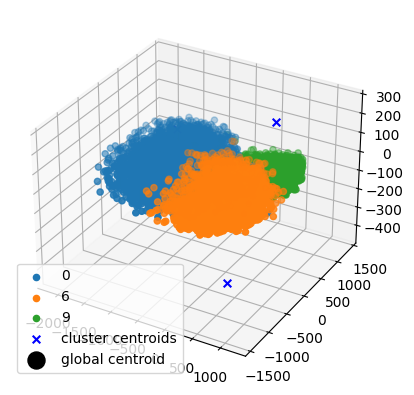

In [90]:
k=3
print(Z.shape)
Z1=Z[:,Ytrain==0]
Z2=Z[:,Ytrain==6]
Z3=Z[:,Ytrain==9]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z1[0,:], Z1[1,:], label="0") 
ax.scatter(Z2[0,:], Z2[1,:], label="6") 
ax.scatter(Z3[0,:], Z3[1,:], label="9") 

C1z=np.mean(Z1, axis=1).reshape(k,1)
C2z=np.mean(Z2, axis=1).reshape(k,1)
C3z=np.mean(Z3, axis=1).reshape(k,1)
Cz=np.mean(Z, axis=1).reshape(k,1)
print(C1z.shape)



ax.scatter(C1z[0], C1z[1], C1z[2],  c="blue",s=30, marker="x", label="cluster centroids")
ax.scatter(C2z[0], C2z[1], C2z[2], c="blue",s=30, marker="x")
ax.scatter(C3z[0], C3z[1],C3z[2],  c="blue",s=30, marker="x")
ax.scatter(Cz[0], Cz[1], Cz[2],  c="black",s=150, marker="o", label="global centroid")
plt.legend()
plt.show()

In [91]:
D1=[]
for i in range(Z1.shape[1]):
    D1.append(np.linalg.norm(Z1[:,i]-C1z,2)**2)
print(f"average distance form C1: {np.mean(D1)}")

D2=0
for i in range(Z2.shape[1]):
    D2+=np.linalg.norm(Z2[:,i]-C2z, 2)**2
D2=D2/Z2.shape[1]
print(f"average distance form C2: {D2}")

D3=0
for i in range(Z3.shape[1]):
    D3+=np.linalg.norm(Z3[:,i]-C3z, 2)**2
D3=D3/Z3.shape[1]
print(f"average distance form C3: {D3}")

average distance form C1: 4965405.251237351
average distance form C2: 3087557.443789697
average distance form C3: 1040861.7366948386


Accuracy of test set for k=3

In [92]:
def min(vec):
    min=100000000
    ind=0
    for i in vec:
        if i<=min:
            min=i
            minInd=ind
        ind+=1
    return minInd

Ztest=Uk.T@Xtest
testSize=Ztest.shape[1]

Ypredict=[]
for i in range(testSize):
    D1=np.linalg.norm(Ztest[:,i]-C1z,2)**2
    D2=np.linalg.norm(Ztest[:,i]-C2z,2)**2
    D3=np.linalg.norm(Ztest[:,i]-C3z,2)**2

    minI=min([D1,D2,D3])  
    if(minI==0):
        Ypredict.append(0)
    elif(minI==1):
        Ypredict.append(6)
    else:
        Ypredict.append(9)

print("total datapoints:",len(Ypredict))
sum=0
i=0
for y in Ypredict:
    if(y==Ytest[i]):
        sum+=1
    i+=1
print("matches:",sum)
accuracy=sum/testSize
print(f"prediction accuracy = {accuracy}")

total datapoints: 4983
matches: 3228
prediction accuracy = 0.6478025285972305


Comparing accuracy with different k

Text(0, 0.5, 'accuracy')

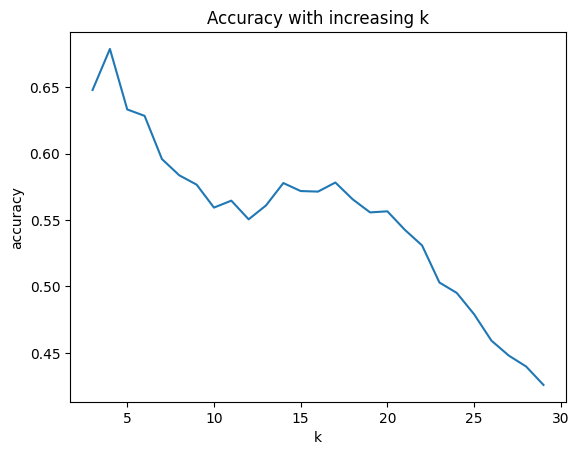

In [93]:
def min(vec):
    min=100000000
    ind=0
    minInd=0
    for i in vec:
        if i<=min:
            min=i
            minInd=ind
        ind+=1
    return minInd

accuracies=[]
for k in range(0,27):
    Ztest=np.array(U_vect[k]).T@Xtest
    Z=np.array(U_vect[k]).T@Xc
    Z1=Z[:,Ytrain==0]
    Z2=Z[:,Ytrain==6]
    Z3=Z[:,Ytrain==9]
    C1z=np.mean(Z1, axis=1).reshape(k+3,1)
    C2z=np.mean(Z2, axis=1).reshape(k+3,1)
    C3z=np.mean(Z3, axis=1).reshape(k+3,1)
    Cz=np.mean(Z, axis=1).reshape(k+3,1)
    
    Ypredict=[]
    for i in range(testSize):
        D1=np.linalg.norm(Ztest[:,i]-C1z,2)**2
        D2=np.linalg.norm(Ztest[:,i]-C2z,2)**2
        D3=np.linalg.norm(Ztest[:,i]-C3z,2)**2

        minI=min([D1,D2,D3])  
        if(minI==0):
            Ypredict.append(0)
        elif(minI==1):
            Ypredict.append(6)
        else:
            Ypredict.append(9)

    sum=0
    i=0
    for y in Ypredict:
        if(y==Ytest[i]):
            sum+=1
        i+=1
    accuracies.append(sum/testSize)

plt.plot(range(3,30), accuracies)
plt.title("Accuracy with increasing k")
plt.xlabel("k")
plt.ylabel("accuracy")